<a href="https://colab.research.google.com/github/Harjeetsinghengg/node_red_table/blob/main/NLP_Project_LR_110423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Course Work 

# Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/Surrey/CourseWork NLP")
os.getcwd()

'/content/drive/MyDrive/Surrey/CourseWork NLP'

In [4]:
import torch
import torchtext
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

  
# merging the files
joined_files = os.path.join("/content/drive/MyDrive/Surrey/CourseWork NLP/GoEmotion_Data_Set/", "*1.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df_complete = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df_complete)

PyTorch Version:  2.0.0+cu118
torchtext Version:  0.15.1+cpu
Using CPU.
                                                    text       id  \
0                                        That game hurt.  eew5j0j   
1       >sexuality shouldn’t be a grouping category I...  eemcysk   
2         You do right, if you don't care then fuck 'em!  ed2mah1   
3                                     Man I love reddit.  eeibobj   
4      [NAME] was nowhere near them, he was by the Fa...  eda6yn6   
...                                                  ...      ...   
69995        It's about fucking time, hope this is real.  eeuoyeh   
69996  This is great! Can anyone make a request with ...  eer0igi   
69997  I’m sorry. Can you please explain what are the...  eebxspf   
69998                                No but it should be  edjf4v2   
69999  This is so cruel. I literally feel physically ...  ee3dzap   

                    author            subreddit    link_id   parent_id  \
0                    Brdd

In [5]:
print(len(df_complete))
#df_complete = df_complete.iloc[:5000]
print(len(df_complete))

70000
70000


In [6]:

# Remove the columns
df_complete = df_complete.drop(columns=['subreddit',	'link_id',	'parent_id',	'created_utc',	'rater_id', 'author'], axis=1)

# sample only 100 papers
#df_complete = df_complete.sample()

# Print out the first rows of papers
df_complete.head()
print(len(df_complete))
print(df_complete)

70000
                                                    text       id  \
0                                        That game hurt.  eew5j0j   
1       >sexuality shouldn’t be a grouping category I...  eemcysk   
2         You do right, if you don't care then fuck 'em!  ed2mah1   
3                                     Man I love reddit.  eeibobj   
4      [NAME] was nowhere near them, he was by the Fa...  eda6yn6   
...                                                  ...      ...   
69995        It's about fucking time, hope this is real.  eeuoyeh   
69996  This is great! Can anyone make a request with ...  eer0igi   
69997  I’m sorry. Can you please explain what are the...  eebxspf   
69998                                No but it should be  edjf4v2   
69999  This is so cruel. I literally feel physically ...  ee3dzap   

       example_very_unclear  admiration  amusement  anger  annoyance  \
0                     False           0          0      0          0   
1                    

In [7]:
import pandas as pd

# Create a sample DataFrame with multiple columns
df = df_complete

# Melt the DataFrame into a single column with column name
melted_df = pd.melt(df, id_vars=['text', 'example_very_unclear'], var_name='Lables', value_name='Value')

# Filter out the rows where the value is not 1
df_Lable = melted_df[melted_df['Value'] == 1]

#print("Original DataFrame:\n", df.head())
print("\nFiltered DataFrame:\n", df_Lable.head(20))
len(df_Lable)
len(df)



Filtered DataFrame:
                                                     text  \
70015  I appreciate it, that's good to know. I hope I...   
70018           Pretty much every Punjabi dude I've met.   
70028  Lots, play store or apple store vpn. Nord is good   
70035                           nice!! I'll try this one   
70050      She’s like a kewpie doll with them. Precious.   
70067             Nice. I'll look around for it. Thanks!   
70072  I loved how [NAME] feels like everyone in the ...   
70082  I thought it was very good. The guy was one si...   
70085                              Best side quest ever!   
70109                       I love that smile of his!!!!   
70117  Looks like a classic subluxation; that guy nee...   
70170  The possibilities are fascinating. In other ti...   
70175  I don’t think they really thought through the ...   
70182                          Terrifyingly accurate bot   
70213  I love these blobs, would have done the same t...   
70224  Fucking mon

70000

In [8]:
df_Lable['text'][5:5]

Series([], Name: text, dtype: object)

In [9]:
df_Lable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82645 entries, 70015 to 2029998
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  82645 non-null  object
 1   example_very_unclear  82645 non-null  bool  
 2   Lables                82645 non-null  object
 3   Value                 82645 non-null  object
dtypes: bool(1), object(3)
memory usage: 2.6+ MB


In [10]:
#df_Lable.sum()

In [11]:
# This checking the data distribution
df_Lable[['Lables']].value_counts(normalize=True)

Lables        
neutral           0.222917
approval          0.071728
admiration        0.068328
annoyance         0.053760
gratitude         0.046742
disapproval       0.045665
curiosity         0.039531
amusement         0.037280
optimism          0.034933
realization       0.034691
disappointment    0.033529
love              0.033214
joy               0.031545
anger             0.031327
confusion         0.029899
sadness           0.026535
caring            0.024055
excitement        0.022990
surprise          0.021853
disgust           0.020618
desire            0.015101
fear              0.012681
remorse           0.010273
embarrassment     0.009886
nervousness       0.007236
pride             0.005469
relief            0.005469
grief             0.002747
dtype: float64

admiration         5647
amusement          3081
anger              2589
annoyance          4443
approval           5928
caring             1988
confusion          2471
curiosity          3267
desire             1248
disappointment     2771
disapproval        3774
disgust            1704
embarrassment       817
excitement         1900
fear               1048
gratitude          3863
grief               227
joy                2607
love               2745
nervousness         598
optimism           2887
pride               452
realization        2867
relief              452
remorse             849
sadness            2193
surprise           1806
neutral           18423
dtype: int64


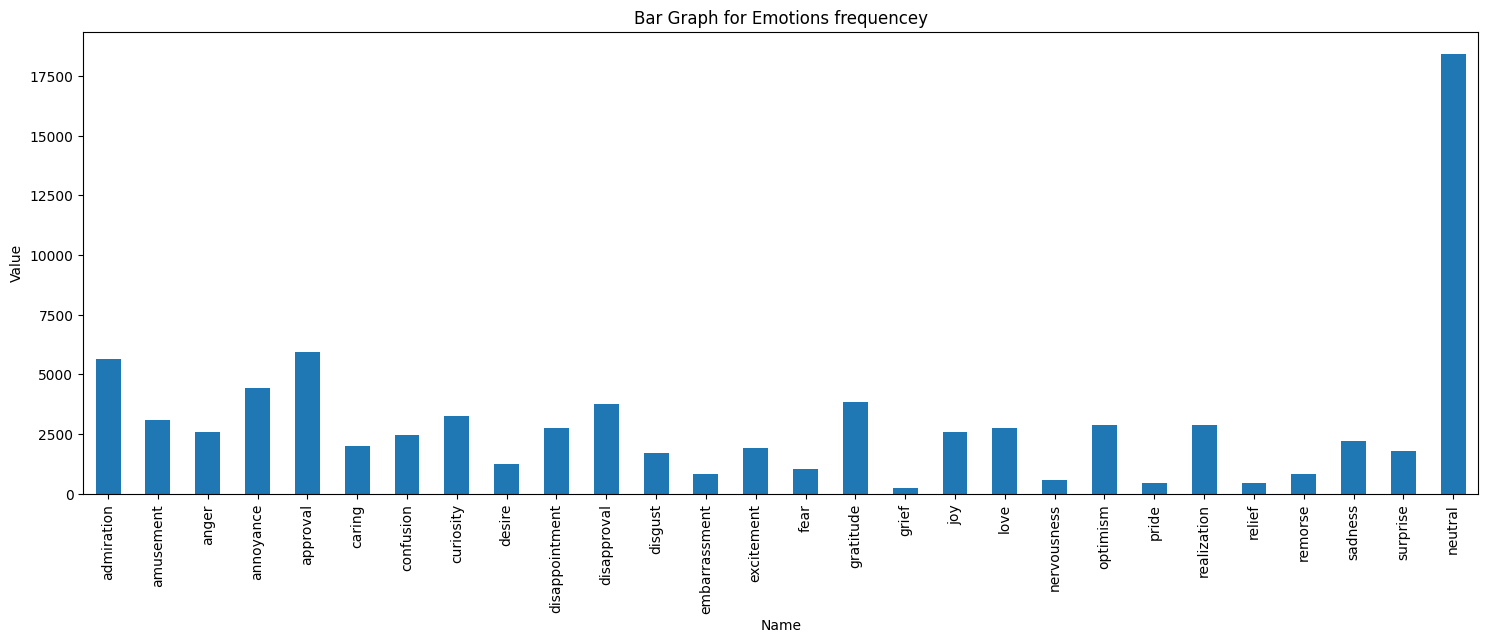

In [12]:
# Plot a bar graph of the emotions quantity sum
emotions=df_complete[['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity','desire', 'disappointment', 'disapproval', 'disgust',
                      'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 
                      'sadness', 'surprise', 'neutral']].sum()
                 
print(emotions)
ax = emotions[['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity','desire', 'disappointment', 'disapproval', 'disgust',
                      'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 
                      'sadness', 'surprise', 'neutral']].plot(kind='bar', figsize=(18, 6), rot=0)

# Add labels and title
ax.set_xlabel('Name')
plt.xticks(rotation=90)
ax.set_ylabel('Value')
ax.set_title('Bar Graph for Emotions frequencey')

# Show the plot
plt.show()

In [13]:
unique_words = df_Lable[['Lables']].stack().unique()

# Print the unique words
print(unique_words)
print("Number of Labels in coupus = ",len(unique_words))

['admiration' 'amusement' 'anger' 'annoyance' 'approval' 'caring'
 'confusion' 'curiosity' 'desire' 'disappointment' 'disapproval' 'disgust'
 'embarrassment' 'excitement' 'fear' 'gratitude' 'grief' 'joy' 'love'
 'nervousness' 'optimism' 'pride' 'realization' 'relief' 'remorse'
 'sadness' 'surprise' 'neutral']
Number of Labels in coupus =  28


In [14]:
import pandas as pd

# Create a sample DataFrame
#data = {'text': ['This is a sample sentence.', 'Another sentence here.', 'Sample sentence again.']}
#df = df_Lable[['Lables']]

# Replace the sentiments lables as per defined and reduced lables
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('joy', 'happiness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('amusement', 'happiness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('grief', 'sadness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('sadness', 'sadness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('confusion', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('fear', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('nervousness', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('annoyance', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('anger', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('curiosity', 'surprise')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('surprise', 'surprise')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('disappointment', 'disgust')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('disgust', 'disgust')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('disapproval', 'disgust')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('excitment', 'anticipation')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('optimism', 'anticipation')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('pride', 'realization')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('realization', 'realization')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('admiration', 'desire')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('desire', 'desire')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('embarrassment', 'shame')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('remorse', 'shame')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('relief', 'relief')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('gratitude', 'relief')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('love', 'love')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('caring', 'love')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('neutral', 'neutral')

# Print the modified DataFrame
print(df_Lable['Lables'])

70015       desire
70018       desire
70028       desire
70035       desire
70050       desire
            ...   
2029987    neutral
2029988    neutral
2029993    neutral
2029994    neutral
2029998    neutral
Name: Lables, Length: 82645, dtype: object


<ipython-input-14-2603ff0c1404>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('joy', 'happiness')
<ipython-input-14-2603ff0c1404>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('amusement', 'happiness')
<ipython-input-14-2603ff0c1404>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [15]:
unique_words = df_Lable['Lables'].unique()

# Print the unique words
print(unique_words)
print("Number of Labels in coupus = ",len(unique_words))

['desire' 'happiness' 'anger' 'approval' 'love' 'surprise' 'disgust'
 'shame' 'excitement' 'relief' 'sadness' 'anticipation' 'realization'
 'neutral']
Number of Labels in coupus =  14


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categories
le.fit(df_Lable['Lables'])

# Print the unique categories
print(list(df_Lable['Lables']))

# Transform the categories into numerical values
encoded_colors = le.transform(df_Lable['Lables'])

# Print the encoded values
print(encoded_colors)


df_Lable['Lables_Number']=encoded_colors
df_Lable.head(5)

['desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire', 'desire',

<ipython-input-16-0673d371d356>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable['Lables_Number']=encoded_colors


,text,example_very_unclear,Lables,Value,Lables_Number
70015,"I appreciate it, that's good to know. I hope I...",False,desire,1,3
70018,Pretty much every Punjabi dude I've met.,False,desire,1,3
70028,"Lots, play store or apple store vpn. Nord is good",False,desire,1,3
70035,nice!! I'll try this one,False,desire,1,3
70050,She’s like a kewpie doll with them. Precious.,False,desire,1,3


# LOGISTIC REGRESSION METHOD

# Dividing data into train data and test data

## ***Defined the Cleaner Function & Applied***

# checked for any null value

In [17]:
df_Lable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82645 entries, 70015 to 2029998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  82645 non-null  object
 1   example_very_unclear  82645 non-null  bool  
 2   Lables                82645 non-null  object
 3   Value                 82645 non-null  object
 4   Lables_Number         82645 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 5.2+ MB


In [18]:
# check for missing values
df_Lable.isnull().sum()

text                    0
example_very_unclear    0
Lables                  0
Value                   0
Lables_Number           0
dtype: int64

In [19]:
# drop the id column
df_Lable.drop(['example_very_unclear'], axis=1, inplace=True)
df_Lable.head()

<ipython-input-19-5d814afc11d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable.drop(['example_very_unclear'], axis=1, inplace=True)


,text,Lables,Value,Lables_Number
70015,"I appreciate it, that's good to know. I hope I...",desire,1,3
70018,Pretty much every Punjabi dude I've met.,desire,1,3
70028,"Lots, play store or apple store vpn. Nord is good",desire,1,3
70035,nice!! I'll try this one,desire,1,3
70050,She’s like a kewpie doll with them. Precious.,desire,1,3


In [20]:
# Check for the class balance
df_Lable['Lables_Number'].value_counts(normalize=True)

8     0.222917
0     0.134902
4     0.099812
3     0.083429
2     0.071728
6     0.068824
13    0.061383
7     0.057269
10    0.052211
9     0.040160
1     0.034933
11    0.029282
5     0.022990
12    0.020159
Name: Lables_Number, dtype: float64

<Axes: >

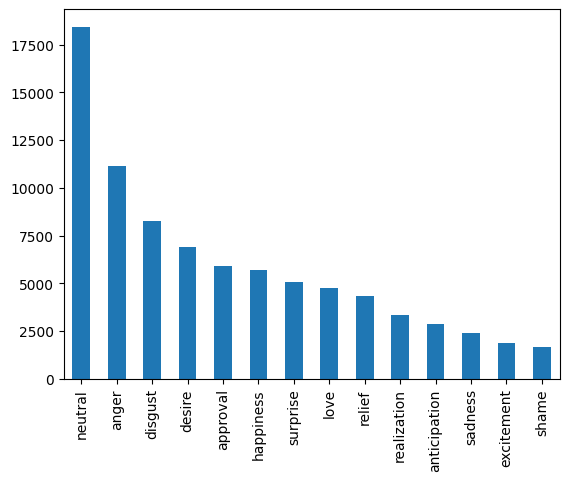

In [21]:
# plot the label counts 
df_Lable['Lables'].value_counts().plot(kind='bar')

# Define the Cleaner Function & Apply

In [22]:
# !pip install contractions

In [23]:
# Removing general stop words + lemmatizer applied
import re
#import contractions
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def df_cleaned_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    #new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
print(df_Lable['text'])
df_cleaned = []
for d in df_Lable['text']:
  df_cleaned.append(df_cleaned_without_stopwords(d))

70015      I appreciate it, that's good to know. I hope I...
70018               Pretty much every Punjabi dude I've met.
70028      Lots, play store or apple store vpn. Nord is good
70035                               nice!! I'll try this one
70050          She’s like a kewpie doll with them. Precious.
                                 ...                        
2029987    When I harass women with innuendo and they pol...
2029988    That would involve reading, and redhats aren't...
2029993    See her recent article in The Atlantic, in add...
2029994    Before we continue, I would first like to ask ...
2029998                                  No but it should be
Name: text, Length: 82645, dtype: object


In [25]:
# Cleaned statements printed below
df_Lable['cleaned_text']=df_cleaned
df_Lable.head(10)


<ipython-input-25-770f4be415c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable['cleaned_text']=df_cleaned


,text,Lables,Value,Lables_Number,cleaned_text
70015,"I appreciate it, that's good to know. I hope I...",desire,1,3,i appreciate it that is good to know i hope i ...
70018,Pretty much every Punjabi dude I've met.,desire,1,3,pretty much every punjabi dude i ve met
70028,"Lots, play store or apple store vpn. Nord is good",desire,1,3,lot play store or apple store vpn nord is good
70035,nice!! I'll try this one,desire,1,3,nice i ll try this one
70050,She’s like a kewpie doll with them. Precious.,desire,1,3,she s like a kewpie doll with them precious
70067,Nice. I'll look around for it. Thanks!,desire,1,3,nice i ll look around for it thanks
70072,I loved how [NAME] feels like everyone in the ...,desire,1,3,i loved how name feel like everyone in the off...
70082,I thought it was very good. The guy was one si...,desire,1,3,i thought it wa very good the guy wa one sick ...
70085,Best side quest ever!,desire,1,3,best side quest ever
70109,I love that smile of his!!!!,desire,1,3,i love that smile of his


# DATA Visualization

In [26]:
# Write a code to collect all the words from all the statements into a single list
all_words = []
for t in df_Lable['text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['I', 'appreciate', 'it,', "that's", 'good', 'to', 'know.', 'I', 'hope', "I'll", 'have', 'to', 'apply', 'that', 'knowledge', 'one', 'day', 'Pretty', 'much', 'every', 'Punjabi', 'dude', "I've", 'met.', 'Lots,', 'play', 'store', 'or', 'apple', 'store', 'vpn.', 'Nord', 'is', 'good', 'nice!!', "I'll", 'try', 'this', 'one', 'She’s', 'like', 'a', 'kewpie', 'doll', 'with', 'them.', 'Precious.', 'Nice.', "I'll", 'look']


56829

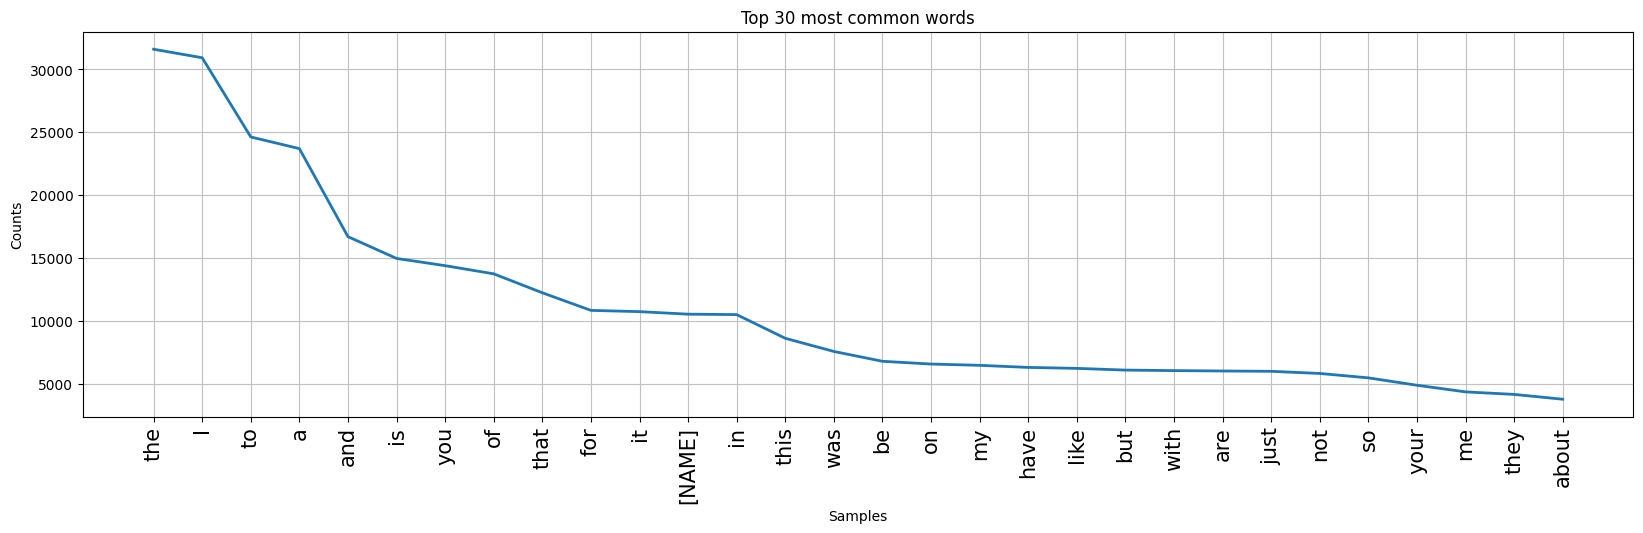

In [27]:
# Frequency Distribution of modt used words in 
import nltk
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(20,5))
plt.title('Top 30 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(30, cumulative=False)

plt.show()

# Now lets plot for cleared text after removing stop words 

In [28]:
# Write the code for plotting the cleaned statements
all_words = []
for t in df_Lable['cleaned_text']:
    all_words.extend(t.split())

print(all_words[:50])

['i', 'appreciate', 'it', 'that', 'is', 'good', 'to', 'know', 'i', 'hope', 'i', 'll', 'have', 'to', 'apply', 'that', 'knowledge', 'one', 'day', 'pretty', 'much', 'every', 'punjabi', 'dude', 'i', 've', 'met', 'lot', 'play', 'store', 'or', 'apple', 'store', 'vpn', 'nord', 'is', 'good', 'nice', 'i', 'll', 'try', 'this', 'one', 'she', 's', 'like', 'a', 'kewpie', 'doll', 'with']


In [29]:
len(set(all_words)) # this is the number of unique words in the list

22763

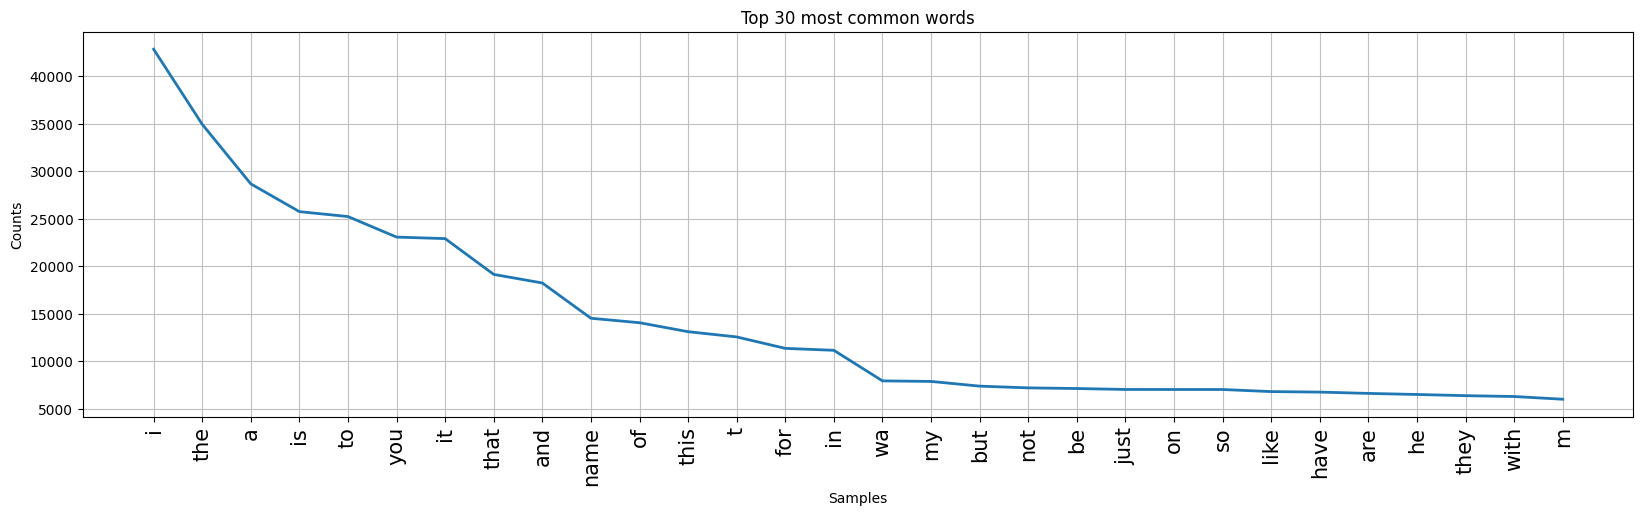

In [30]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(20,5))
plt.title('Top 30 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(30, cumulative=False)

plt.show()

# Improvement after applying removing stop words


In [31]:
# Stop words Removal process
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'whom', 'just', "weren't", 'itself', "that'll", 're', 'should', 'ain', 'hasn', 'i', 'that', 'when', "it's", 'below', 'shan', 'to', 't', 'haven', 'the', 'what', 'of', 'doesn', 'own', "wasn't", 'once', 'hers', 'there', 'same', 'he', 'in', 'not', 'other', 'ourselves', "haven't", 'most', 'yourselves', 'after', 'herself', 'had', 'has', 'your', 'this', 'shouldn', 'about', 'again', 'no', 'd', 'yourself', 'by', 'only', 'weren', 'wouldn', 'until', 'where', 'who', 'or', 'down', 'why', 'at', 'can', 'now', "hadn't", 'we', 'hadn', "she's", 'so', 'more', 'our', 'each', 'y', 'been', 'both', 'do', 'which', 'any', "should've", 'if', "aren't", 'o', 'yours', 'from', 'm', 'through', 'out', "don't", 'mightn', 'is', "mustn't", 'off', 'then', "needn't", 've', 'before', 'themselves', "shan't", 'theirs', 'under', 'these', "you'll", 'you', 'as', 'some', 'them', 'ma', 'than', 'did', 'does', 'doing', 'it', 'with', 'being', 'couldn', 'and', 'a', 'between', 'their', "hasn't", 'have', 'further', 'too', 'will', 'don

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
len(nltk_stopwords)

179

In [33]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'rather', 'elsewhere', 'thin', 'one', 'serious', 'almost', 're', 'should', 'could', 'front', 'i', 'full', 'that', 'when', 'fifty', 'below', 'nevertheless', 'never', 'to', 'the', 'own', 'once', 'hers', 'wherever', 'towards', 'also', 'there', 'same', 'he', 'ourselves', 'hence', 'etc', 'most', 'inc', 'after', 'couldnt', 'something', 'herself', 'hundred', 'has', 'your', 'this', 'made', 'about', 'becomes', 'others', 'become', 'always', 'two', 'yourself', 'only', 'by', 'third', 'where', 'un', 'beyond', 'interest', 'who', 'whereas', 'or', 'thence', 'sometime', 'bill', 'can', 'now', 'everywhere', 'without', 'already', 'name', 'whereafter', 'toward', 'much', 'yet', 'sincere', 'six', 'any', 'which', 'if', 'wherein', 'anyone', 'somewhere', 'keep', 'whoever', 'from', 'through', 'ie', 'is', 'fire', 'whether', 'must', 'everything', 'then', 'before', 'sixty', 'ever', 'under', 'enough', 'anyhow', 'these', 'you', 'some', 'than', 'since', 'it', 'with', 'cannot', 'twelve', 'and', 'might', 'their', 'thro

In [34]:
len(sklearn_stopwords)

318

In [35]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'whom', 'itself', 're', 'should', 'i', 'that', 'when', 'below', 'to', 'the', 'of', 'what', 'own', 'once', 'hers', 'there', 'same', 'he', 'in', 'not', 'other', 'ourselves', 'most', 'yourselves', 'after', 'herself', 'had', 'has', 'your', 'this', 'about', 'again', 'no', 'yourself', 'by', 'only', 'until', 'where', 'who', 'or', 'down', 'why', 'at', 'can', 'now', 'we', 'so', 'more', 'our', 'each', 'been', 'both', 'do', 'which', 'any', 'if', 'yours', 'from', 'through', 'out', 'is', 'off', 'then', 'before', 'themselves', 'under', 'these', 'as', 'you', 'some', 'them', 'than', 'it', 'with', 'being', 'and', 'a', 'between', 'their', 'have', 'further', 'too', 'will', 'while', 'such', 'nor', 'she', 'against', 'into', 'but', 'all', 'am', 'be', 'him', 'his', 'because', 'here', 'for', 'me', 'my', 'was', 'up', 'its', 'an', 'myself', 'are', 'ours', 'they', 'how', 'himself', 'over', 'during', 'very', 'on', 'her', 'few', 'those', 'were', 'above'}


In [36]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)
#combined_stopwords

378

In [37]:
type(combined_stopwords)

set

In [38]:
def df_cleaned_removed_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    #new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [39]:
print(df_Lable['text'])
df_cleaned = []
for d in df_Lable['text']:
  df_cleaned.append(df_cleaned_removed_stopwords(d))

70015      I appreciate it, that's good to know. I hope I...
70018               Pretty much every Punjabi dude I've met.
70028      Lots, play store or apple store vpn. Nord is good
70035                               nice!! I'll try this one
70050          She’s like a kewpie doll with them. Precious.
                                 ...                        
2029987    When I harass women with innuendo and they pol...
2029988    That would involve reading, and redhats aren't...
2029993    See her recent article in The Atlantic, in add...
2029994    Before we continue, I would first like to ask ...
2029998                                  No but it should be
Name: text, Length: 82645, dtype: object


In [40]:
df_Lable['cleaned_text_stop_words_removed']=df_cleaned
df_Lable.head()

<ipython-input-40-a651494c5260>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable['cleaned_text_stop_words_removed']=df_cleaned


,text,Lables,Value,Lables_Number,cleaned_text,cleaned_text_stop_words_removed
70015,"I appreciate it, that's good to know. I hope I...",desire,1,3,i appreciate it that is good to know i hope i ...,appreciate good know hope apply knowledge day
70018,Pretty much every Punjabi dude I've met.,desire,1,3,pretty much every punjabi dude i ve met,pretty punjabi dude met
70028,"Lots, play store or apple store vpn. Nord is good",desire,1,3,lot play store or apple store vpn nord is good,lot play store apple store vpn nord good
70035,nice!! I'll try this one,desire,1,3,nice i ll try this one,nice try
70050,She’s like a kewpie doll with them. Precious.,desire,1,3,she s like a kewpie doll with them precious,like kewpie doll precious


['appreciate', 'good', 'know', 'hope', 'apply', 'knowledge', 'day', 'pretty', 'punjabi', 'dude', 'met', 'lot', 'play', 'store', 'apple', 'store', 'vpn', 'nord', 'good', 'nice', 'try', 'like', 'kewpie', 'doll', 'precious', 'nice', 'look', 'thanks', 'loved', 'feel', 'like', 'office', 'family', 'relationship', 'cute', 'innocent', 'thought', 'good', 'guy', 'sick', 'bastard', 'sure', 'best', 'quest', 'love', 'smile', 'look', 'like', 'classic', 'subluxation']


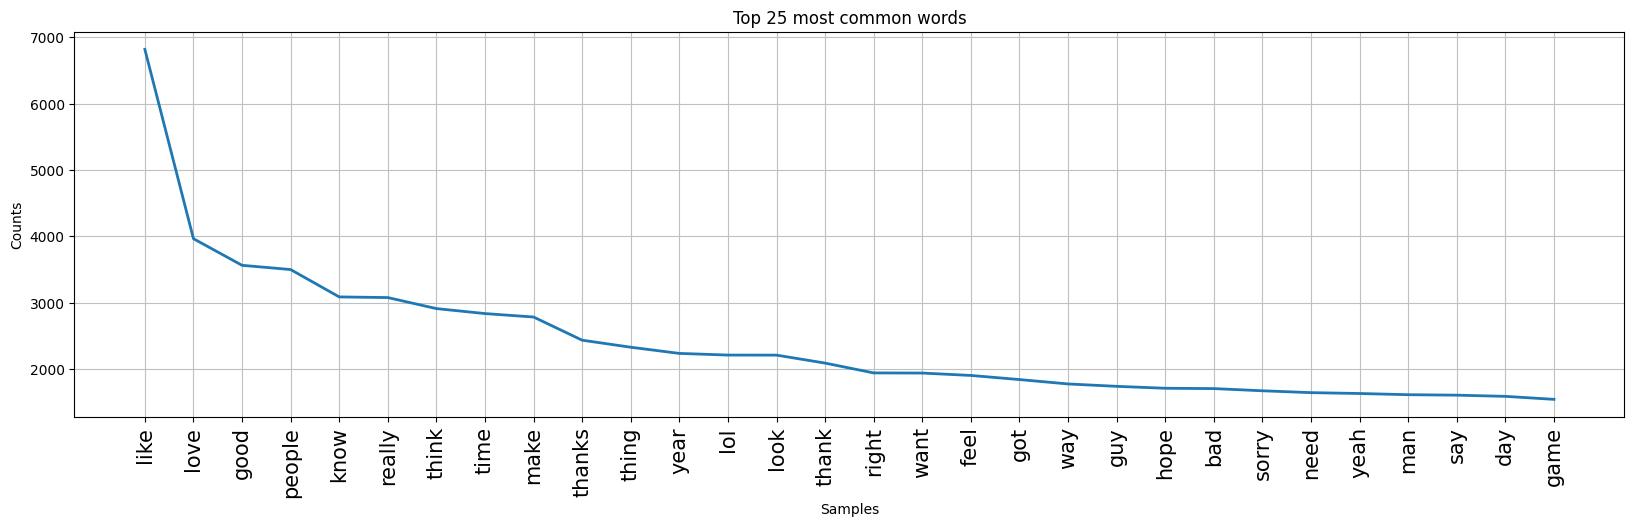

In [41]:
all_words = []
for t in df_Lable['cleaned_text_stop_words_removed']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(20,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(30, cumulative=False)

plt.show()

# Bag of Words Model (Feature Extraction)
- CountVectorizer
- TF-IDF Vectorizer

In [42]:
df_Lable.shape

(82645, 6)

first number above show vocab  lenght, 
Mode Binary, frequency, TFIDF, count mode
Structured text from binary mode. countVectorizer add the count also.


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(df_Lable['cleaned_text'])
CV_features.shape
CV_features[0]

<1x22737 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [44]:
CV_features.shape

(82645, 22737)

In [45]:
CV_features[0].todense()  # decompressing the Compressed sparse row matrix

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [46]:
df = pd.DataFrame(CV_features.todense() )
df  # This is document term matrix

,0,1,2,3,4,5,6,7,8,9,...,22727,22728,22729,22730,22731,22732,22733,22734,22735,22736
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.size/1e6  # these many elements/numbers are presnt in the df

1879.099365

In [48]:
import numpy as np
np.count_nonzero(df)

977135

In [49]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.05200017722319863

In [50]:
CV.get_feature_names_out()[:50]  # these the VOCAB words

array(['aa', 'aaa', 'aaaaaaaaaaaaaaand', 'aaaaaaaaaaaaaahhh',
       'aaaaaaaaaaaah', 'aaaaaaaaaaah', 'aaaaaaand', 'aaaaaand', 'aaaaah',
       'aaaaand', 'aaaagghhh', 'aaaagh', 'aaaand', 'aaah', 'aaahhh',
       'aaahhhhhh', 'aaand', 'aaditi', 'aah', 'aand', 'aaron', 'aarp',
       'aav', 'ab', 'abandon', 'abandoned', 'abandonment', 'abandonned',
       'abaot', 'abathur', 'abattoir', 'abbey', 'abbreviation', 'abby',
       'abc', 'abdomen', 'abduction', 'abel', 'aberdeen', 'aberrant',
       'abetting', 'abhorrent', 'abilify', 'ability', 'abit', 'ablation',
       'able', 'abled', 'abnormal', 'abnormally'], dtype=object)

In [51]:
# Number of vocablury
len(CV.get_feature_names_out())

22737

# Bag of Word TFIDF

In [52]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th

[array(['chiropractor', 'classic', 'get', 'guy', 'like', 'look', 'need',
        'subluxation', 'that', 'the', 'to'], dtype='<U270')]

# Model Building Logistic Regression 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(CV_features, df_Lable['Lables_Number'], test_size=0.25, stratify=df_Lable['Lables'], random_state=42)


In [54]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print("Training Score ->",LR.score(X_train, y_train))  # train score)
print("Testing Score -->",LR.score(X_test, y_test))   # test score) 

Training Score -> 0.5529580691479922
Testing Score --> 0.3733907656567612


Check for cross validation

In [55]:
## L1-REGULARIZATION (LASO) where as L2 is rich good for multi polarity problem
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)  

0.4039333365600245
0.36008130868260574


In [56]:
## leT'S Cross-Validate the Logistic Regression Model
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
X = CV_features
y = df_Lable['Lables']

## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.3)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.36233287 0.36644685 0.36281687 0.36656785 0.36590235]
36.48 0.18


In [57]:
# Cross_Validate will return the training score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
results

{'fit_time': array([5.23223066, 4.77570128, 4.42220163, 5.15779185, 4.58988738]),
 'score_time': array([0.03785133, 0.02124715, 0.02239299, 0.03808904, 0.02120066]),
 'test_score': array([0.36239337, 0.36638635, 0.36281687, 0.36668885, 0.36590235]),
 'train_score': array([0.40490955, 0.40265594, 0.40486418, 0.40067457, 0.40438018])}

#Hyper parameter tuning of the LR1 model

In [ ]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.20001000000000002}, 0.3672454473954867, 4)

In [ ]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

36.72454473954867

In [ ]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

39.07223667493496

In [ ]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.2876480535753719

In [ ]:
grid_results.cv_results_['mean_test_score']

array([0.13490229, 0.3557263 , 0.36477706, 0.36672515, 0.36724545,
       0.36653155, 0.36471656, 0.36406316, 0.36263537, 0.36128017,
       0.35962248, 0.35767439, 0.3561861 , 0.355085  , 0.35362091,
       0.35192692, 0.35026922, 0.34893823, 0.34789763, 0.34673604])

In [ ]:
grid_results.cv_results_['mean_train_score']

array([0.13490229, 0.36213322, 0.37608143, 0.3840795 , 0.39072237,
       0.39711719, 0.40347268, 0.40956198, 0.41706697, 0.42347087,
       0.43014399, 0.43701676, 0.4433904 , 0.44976103, 0.45609535,
       0.46189425, 0.46680077, 0.4718767 , 0.47639906, 0.48103636])

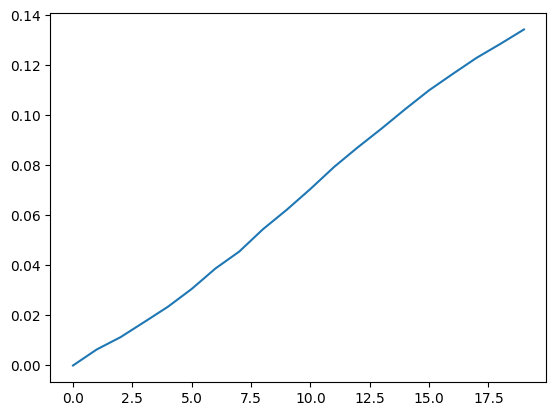

In [ ]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [ ]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [ ]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [ ]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([0.        , 0.00640692, 0.01130437, 0.01735435, 0.02347692,
       0.03058564, 0.03875613, 0.04549882, 0.05443161, 0.0621907 ,
       0.07052151, 0.07934237, 0.08720431, 0.09467602, 0.10247444,
       0.10996733, 0.11653155, 0.12293847, 0.12850142, 0.13430032])

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = df_Lable['cleaned_text_stop_words_removed']
y = df_Lable['Lables_Number']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

36.33 0.21


In [ ]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [ ]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

22183

# LR MODEL WITHOUT WITH STOP_WORDS

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = df_Lable['cleaned_text']
y = df_Lable['Lables']
final_stopwords = list(combined_stopwords)
CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

36.52 0.59


22417

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = df_Lable['cleaned_text']
y = df_Lable['Lables']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

36.44 0.51


5319

# Now feature reduced to 300 and accuracy not changed much

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = df_Lable['cleaned_text']
y = df_Lable['Lables']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

33.95 0.26


300

# 7. TF-IDF Vector BoW Model + Logistic Regression

In [ ]:
# 7. TF-IDF Vector BoW Model + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df_Lable['cleaned_text']
y = df_Lable['Lables']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print("Train Score->",np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print("Test score->",np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

Train Score-> 36.9 0.09
Test score-> 35.23 0.37


1000

# Dimesionality Reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

X = df_Lable['cleaned_text']
y = df_Lable['Lables']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  

36.05 0.1
34.04 0.44


22737

# N-Gram Models

In [ ]:
# Unigrams + Bigrams
X = df_Lable['cleaned_text']
y = df_Lable['Lables']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


41.38 0.07
36.45 0.5


22768

In [ ]:
import joblib
joblib.__version__
# !pip install mglearn
import mglearn
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names())
# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

ModuleNotFoundError: ignored

In [ ]:
len(coef.ravel()), len(feature_names) 

In [ ]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [ ]:
# Unigrams + Bigrams + Trigrams
X = df_Lable['cleaned_text']
y = df_Lable['Lables']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

In [ ]:
# Visualizing only the trigrams
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
feature_names = np.array(CV.get_feature_names())

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [ ]:
df_Lable.to_pickle("tweets_cleaned.pkl")

# Word Embeddings

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [ ]:
data = pd.read_pickle("tweets_cleaned.pkl")
data.head()

In [ ]:
tweets_list = list(data['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

In [ ]:
# !pip install gensim

In [ ]:
# Creating your own Word2Vec Model & Train
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [ ]:
# summarize the loaded model
print(cbow_model)

In [ ]:
cbow_model.wv.index_to_key[:20]  # this your voca

In [ ]:
len(cbow_model.wv.index_to_key)

In [ ]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

# np.mean(model[doc], axis=0)

In [ ]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector)

In [ ]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

In [ ]:
tweets_temp[0].shape  # each document vecotr is 300-dimensional !!

In [ ]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MA

In [ ]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

In [ ]:
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

# 11. Word Embeddings from GloVe Model

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
# load the converted model
filename = 'word2vec.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
model.get_vector('analytics')

In [ ]:
def document_vector_GloVe(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(model.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

In [ ]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector_GloVe)

In [ ]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

In [ ]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 100
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

# tweets_vec.shape # this itself is your final FEATURE MATRIX
# Create a new DF to store these new documnent features
df1 = pd.DataFrame(tweets_vec)
df1['y'] = data['label']
df1.dropna(how='any', axis=0, inplace=True)

X_word_emb = df1.drop('y', axis=1)
y = df1['y']
X_word_emb.shape

In [ ]:

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 


# Transformer

In [ ]:
# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install ipywidgets transformers tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [ ]:
import torch
import torchtext
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
# merging the files
joined_files = os.path.join("/content/drive/MyDrive/Surrey/CourseWork NLP/GoEmotion_Data_Set/", "*1.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df_complete = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df_complete)

                                                    text       id  \
0                                        That game hurt.  eew5j0j   
1       >sexuality shouldn’t be a grouping category I...  eemcysk   
2         You do right, if you don't care then fuck 'em!  ed2mah1   
3                                     Man I love reddit.  eeibobj   
4      [NAME] was nowhere near them, he was by the Fa...  eda6yn6   
...                                                  ...      ...   
69995        It's about fucking time, hope this is real.  eeuoyeh   
69996  This is great! Can anyone make a request with ...  eer0igi   
69997  I’m sorry. Can you please explain what are the...  eebxspf   
69998                                No but it should be  edjf4v2   
69999  This is so cruel. I literally feel physically ...  ee3dzap   

                    author            subreddit    link_id   parent_id  \
0                    Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1              TheGreen

In [ ]:
# Remove the columns
df_complete = df_complete.drop(columns=['subreddit',	'link_id',	'parent_id',	'created_utc',	'rater_id', 'author'], axis=1)

# sample only 100 papers
#df_complete = df_complete.sample()

# Print out the first rows of papers
df_complete.head()
print(len(df_complete))
print(df_complete)

70000
                                                    text       id  \
0                                        That game hurt.  eew5j0j   
1       >sexuality shouldn’t be a grouping category I...  eemcysk   
2         You do right, if you don't care then fuck 'em!  ed2mah1   
3                                     Man I love reddit.  eeibobj   
4      [NAME] was nowhere near them, he was by the Fa...  eda6yn6   
...                                                  ...      ...   
69995        It's about fucking time, hope this is real.  eeuoyeh   
69996  This is great! Can anyone make a request with ...  eer0igi   
69997  I’m sorry. Can you please explain what are the...  eebxspf   
69998                                No but it should be  edjf4v2   
69999  This is so cruel. I literally feel physically ...  ee3dzap   

       example_very_unclear  admiration  amusement  anger  annoyance  \
0                     False           0          0      0          0   
1                    

In [ ]:
import pandas as pd

# Create a sample DataFrame with multiple columns
df = df_complete

# Melt the DataFrame into a single column with column name
melted_df = pd.melt(df, id_vars=['text', 'example_very_unclear'], var_name='Lables', value_name='Value')

# Filter out the rows where the value is not 1
df_Lable = melted_df[melted_df['Value'] == 1]

#print("Original DataFrame:\n", df.head())
print("\nFiltered DataFrame:\n", df_Lable.head(20))
len(df_Lable)
len(df)


Filtered DataFrame:
                                                     text  \
70015  I appreciate it, that's good to know. I hope I...   
70018           Pretty much every Punjabi dude I've met.   
70028  Lots, play store or apple store vpn. Nord is good   
70035                           nice!! I'll try this one   
70050      She’s like a kewpie doll with them. Precious.   
70067             Nice. I'll look around for it. Thanks!   
70072  I loved how [NAME] feels like everyone in the ...   
70082  I thought it was very good. The guy was one si...   
70085                              Best side quest ever!   
70109                       I love that smile of his!!!!   
70117  Looks like a classic subluxation; that guy nee...   
70170  The possibilities are fascinating. In other ti...   
70175  I don’t think they really thought through the ...   
70182                          Terrifyingly accurate bot   
70213  I love these blobs, would have done the same t...   
70224  Fucking mon

70000

admiration         5647
amusement          3081
anger              2589
annoyance          4443
approval           5928
caring             1988
confusion          2471
curiosity          3267
desire             1248
disappointment     2771
disapproval        3774
disgust            1704
embarrassment       817
excitement         1900
fear               1048
gratitude          3863
grief               227
joy                2607
love               2745
nervousness         598
optimism           2887
pride               452
realization        2867
relief              452
remorse             849
sadness            2193
surprise           1806
neutral           18423
dtype: int64


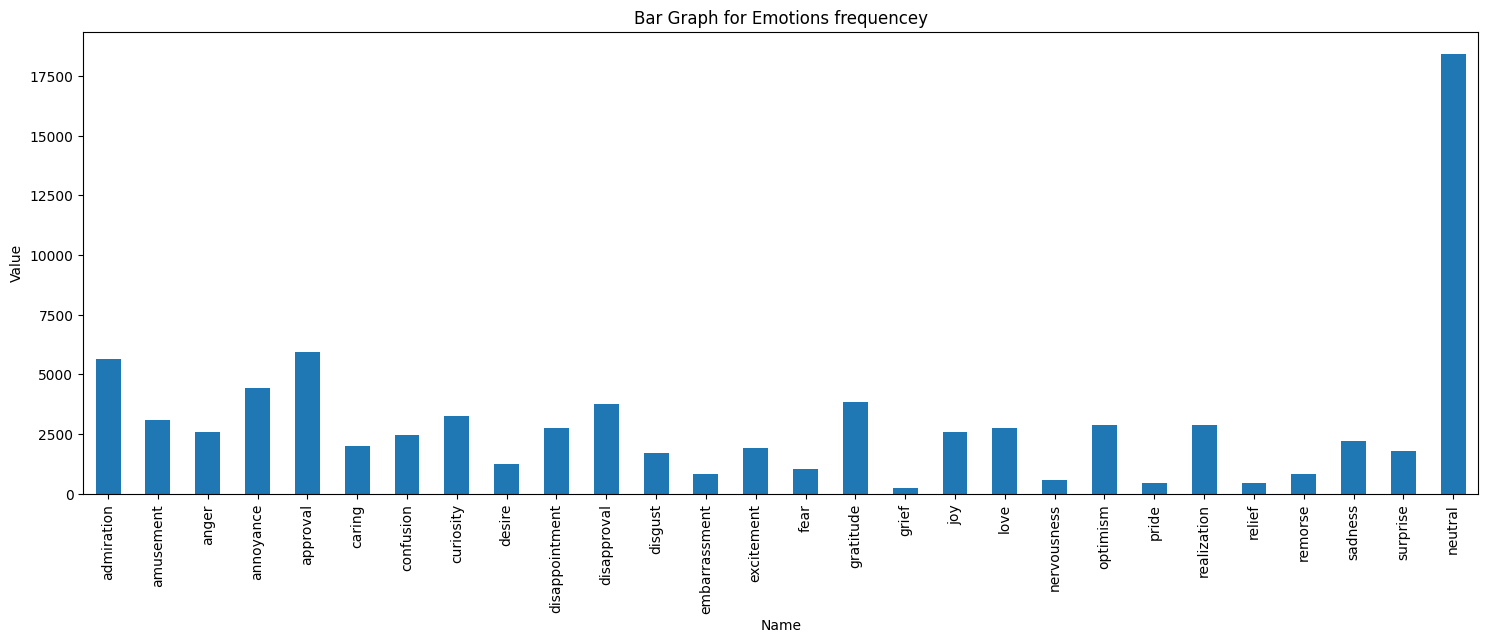

In [ ]:
# Plot a bar graph of the emotions quantity sum
emotions=df_complete[['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity','desire', 'disappointment', 'disapproval', 'disgust',
                      'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 
                      'sadness', 'surprise', 'neutral']].sum()
                 
print(emotions)
ax = emotions[['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity','desire', 'disappointment', 'disapproval', 'disgust',
                      'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 
                      'sadness', 'surprise', 'neutral']].plot(kind='bar', figsize=(18, 6), rot=0)

# Add labels and title
ax.set_xlabel('Name')
plt.xticks(rotation=90)
ax.set_ylabel('Value')
ax.set_title('Bar Graph for Emotions frequencey')

# Show the plot
plt.show()

In [ ]:
unique_words = df_Lable[['Lables']].stack().unique()
unique_Value = df_Lable[['Value']].stack().unique()
# Print the unique words
print(unique_words)
print(unique_Value)
print("Number of Labels in coupus = ",len(unique_words))

['admiration' 'amusement' 'anger' 'annoyance' 'approval' 'caring'
 'confusion' 'curiosity' 'desire' 'disappointment' 'disapproval' 'disgust'
 'embarrassment' 'excitement' 'fear' 'gratitude' 'grief' 'joy' 'love'
 'nervousness' 'optimism' 'pride' 'realization' 'relief' 'remorse'
 'sadness' 'surprise' 'neutral']
[1]
Number of Labels in coupus =  28


In [ ]:
import pandas as pd

# Create a sample DataFrame
#data = {'text': ['This is a sample sentence.', 'Another sentence here.', 'Sample sentence again.']}
#df = df_Lable[['Lables']]

# Replace the sentiments lables as per defined and reduced lables
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('joy', 'happiness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('amusement', 'happiness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('grief', 'sadness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('sadness', 'sadness')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('confusion', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('fear', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('nervousness', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('annoyance', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('anger', 'anger')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('curiosity', 'surprise')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('surprise', 'surprise')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('disappointment', 'disgust')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('disgust', 'disgust')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('disapproval', 'disgust')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('excitment', 'anticipation')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('optimism', 'anticipation')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('pride', 'realization')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('realization', 'realization')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('admiration', 'desire')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('desire', 'desire')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('embarrassment', 'shame')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('remorse', 'shame')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('relief', 'relief')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('gratitude', 'relief')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('love', 'love')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('caring', 'love')
df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('neutral', 'neutral')

# Print the modified DataFrame
print(df_Lable['Lables'])

70015       desire
70018       desire
70028       desire
70035       desire
70050       desire
            ...   
2029987    neutral
2029988    neutral
2029993    neutral
2029994    neutral
2029998    neutral
Name: Lables, Length: 82645, dtype: object


<ipython-input-92-2603ff0c1404>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('joy', 'happiness')
<ipython-input-92-2603ff0c1404>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Lable.loc[:, 'Lables'] = df_Lable['Lables'].replace('amusement', 'happiness')
<ipython-input-92-2603ff0c1404>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
unique_words = df_Lable['Lables'].unique()

# Print the unique words
print(unique_words)
print("Number of Labels in coupus = ",len(unique_words))

['desire' 'happiness' 'anger' 'approval' 'love' 'surprise' 'disgust'
 'shame' 'excitement' 'relief' 'sadness' 'anticipation' 'realization'
 'neutral']
Number of Labels in coupus =  14


In [ ]:
# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install ipywidgets transformers tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 998.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118


In [ ]:
import torch

import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokens = tokenizer.tokenize('Hello WORLD how ARE yoU?')

print(tokens)

# Try Roberta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
df = df_complete
print(df.shape)
df = df.head(500)
print(df.shape)

(70000, 31)
(500, 31)


In [ ]:
df['text'].values[0]

'That game hurt.'

In [ ]:
df_Lable['Lables_Number'].value_counts()

8     18423
0     11149
4      8249
3      6895
2      5928
6      5688
13     5073
7      4733
10     4315
9      3319
1      2887
11     2420
5      1900
12     1666
Name: Lables_Number, dtype: int64

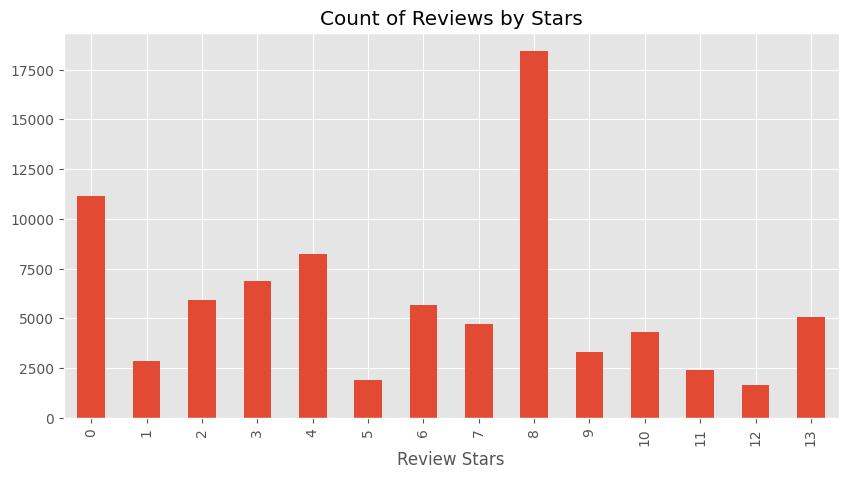

In [ ]:
ax = df_Lable['Lables_Number'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# NLTK Basic

In [ ]:
example = df_Lable['text'][70015]
print(example)

I appreciate it, that's good to know. I hope I'll have to apply that knowledge one day


In [ ]:
nltk.download('punkt')
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I',
 'appreciate',
 'it',
 ',',
 'that',
 "'s",
 'good',
 'to',
 'know',
 '.',
 'I',
 'hope',
 'I',
 "'ll",
 'have',
 'to',
 'apply',
 'that',
 'knowledge',
 'one',
 'day']

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'appreciate', 'it', ',', 'that', "'s", 'good', 'to', 'know', '.']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('appreciate', 'VBP'),
 ('it', 'PRP'),
 (',', ','),
 ('that', 'WDT'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('know', 'VB'),
 ('.', '.')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  appreciate/VBP
  it/PRP
  ,/,
  that/WDT
  's/VBZ
  good/JJ
  to/TO
  know/VB
  ./.
  I/PRP
  hope/VBP
  I/PRP
  'll/MD
  have/VB
  to/TO
  apply/VB
  that/DT
  knowledge/NN
  one/CD
  day/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


VADER se

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#nltk.download('all')
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.8176}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
res

{'eew5j0j': {'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'compound': -0.5267},
 'eemcysk': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'ed2mah1': {'neg': 0.191, 'neu': 0.581, 'pos': 0.228, 'compound': 0.1316},
 'eeibobj': {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369},
 'eda6yn6': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'eespn2i': {'neg': 0.099, 'neu': 0.609, 'pos': 0.293, 'compound': 0.6239},
 'eczuekb': {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.6297},
 'ed5tx8y': {'neg': 0.099, 'neu': 0.741, 'pos': 0.16, 'compound': 0.3612},
 'ef961hv': {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939},
 'edl7cr3': {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.69},
 'ed9w1hm': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'ee52cjs': {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.438},
 'ef7tl7i': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'ee9vw9t': {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': 

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,id,neg,neu,pos,compound,text,example_very_unclear,admiration,amusement,anger,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,0.630,0.370,0.000,-0.5267,That game hurt.,False,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,0.000,1.000,0.000,0.0000,>sexuality shouldn’t be a grouping category I...,True,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,0.191,0.581,0.228,0.1316,"You do right, if you don't care then fuck 'em!",False,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,0.000,0.323,0.677,0.6369,Man I love reddit.,False,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,0.000,1.000,0.000,0.0000,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Roberta

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.7 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I appreciate it, that's good to know. I hope I'll have to apply that knowledge one day


{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.8176}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0023000636, 'roberta_neu': 0.028358106, 'roberta_pos': 0.9693419}


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df_Lable['text'], df_Lable['Lables_Number'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df_Lable['Lables_Number'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')
#outputs = model(**inputs, return_dict=False)
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained("bert-base-cased")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [ ]:
# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


# Tokenization

<Axes: >

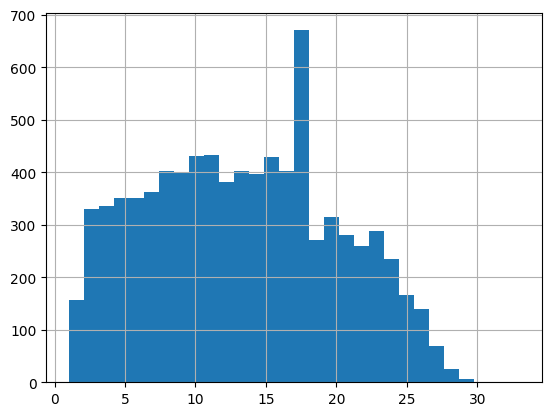

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)
     

In [ ]:
max_seq_len = 25

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)
     

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Convert Integer Sequences to Tensors

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

# Create DataLoaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,14)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False) # Made changed here also
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x
      

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU model: {torch.cuda.get_device_name(0)}")
    print(f"Number of available GPU's: {torch.cuda.device_count()}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

GPU model: Tesla T4
Number of available GPU's: 1


In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
#class_wts = compute_class_weight('balanced', np.unique(train_labels), train_labels)
#class_wts = compute_class_weight('balanced', np.unique(train_labels), train_labels)

class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)


print(class_wts)

[0.52448437 2.03485518 1.01742759 0.86192556 0.70745861 3.30806065
 1.00024131 1.25453995 0.32660941 1.68701669 1.33968972 2.23450135
 3.79578755 1.19866975]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 50

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

     # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  import datetime
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)
         # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds


In [ ]:
import datetime
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
#for epoch in range(1):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 1
  Batch    50  of    260.
  Batch   100  of    260.
  Batch   150  of    260.
  Batch   200  of    260.
  Batch   250  of    260.

Evaluating...


NameError: ignored

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

In [ ]:
# confusion matrix
pd.crosstab(test_y, preds)

***Remove punctuation/lower casing***

Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [ ]:
import re
# Remove punctuation
df_complete['text'] = df_complete['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_complete['text'] = df_complete['text'].map(lambda x: x.lower())

# Print out the first rows of papers
df_complete['text'].head()

169306    it doesn't matter you can pick someone with th...
4680                                     he's pretty badass
85423     it doesn't bother me for some reason i'm just ...
88382     several of the scenarios in the ad were talkin...
122773    [name] isn’t a rocket scientist i was surprise...
Name: text, dtype: object

# Tokenize words and further clean-up text
Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df_complete.text.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:2][1][:31])

['he', 'pretty', 'badass']


In [ ]:
%%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 18.2 ms, sys: 1.6 ms, total: 19.8 ms
Wall time: 30.4 ms


In [ ]:
# Write a code to collect all the words from all the statements into a single list
all_words = []
for t in df_complete['text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['it', "doesn't", 'matter', 'you', 'can', 'pick', 'someone', 'with', 'the', '#1', 'pick', 'that', 'will', 'never', 'be', 'any', 'good', "he's", 'pretty', 'badass', 'it', "doesn't", 'bother', 'me', 'for', 'some', 'reason', "i'm", 'just', 'lactose', 'intolerant', 'several', 'of', 'the', 'scenarios', 'in', 'the', 'ad', 'were', 'talking', 'about', 'intervening', 'when', 'boys', 'were', 'attacking/bullying', 'other', 'boys', '[name]', 'isn’t']


611

# Frequency Distribution

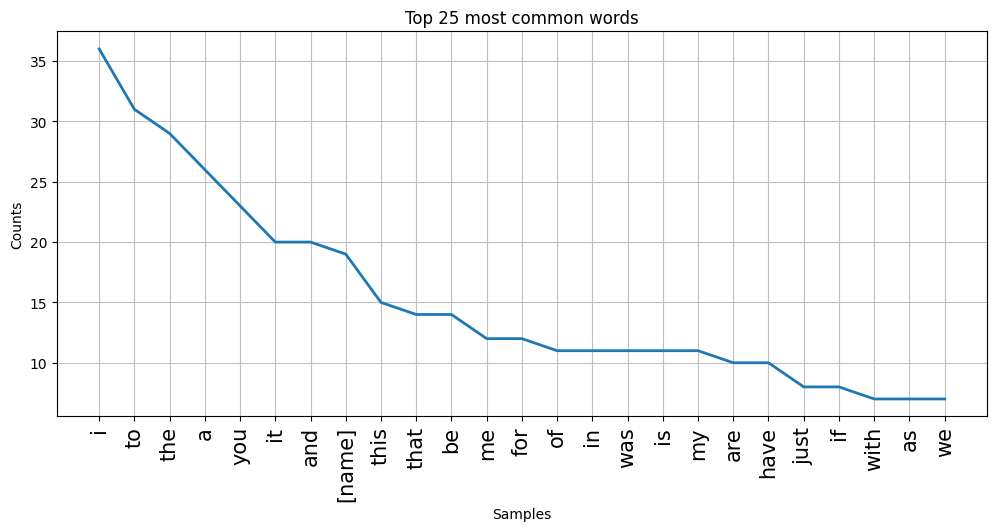

In [ ]:
# Frequency Distribution
import nltk
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

## Plot for Cleaned text

In [ ]:
# Write the code for plotting the cleaned statements
all_words = []
for t in df_complete['text']:
    all_words.extend(t.split())

print(all_words[:50])

['it', "doesn't", 'matter', 'you', 'can', 'pick', 'someone', 'with', 'the', '#1', 'pick', 'that', 'will', 'never', 'be', 'any', 'good', "he's", 'pretty', 'badass', 'it', "doesn't", 'bother', 'me', 'for', 'some', 'reason', "i'm", 'just', 'lactose', 'intolerant', 'several', 'of', 'the', 'scenarios', 'in', 'the', 'ad', 'were', 'talking', 'about', 'intervening', 'when', 'boys', 'were', 'attacking/bullying', 'other', 'boys', '[name]', 'isn’t']


In [ ]:
len(set(all_words)) # this is the number of unique words in the list

611

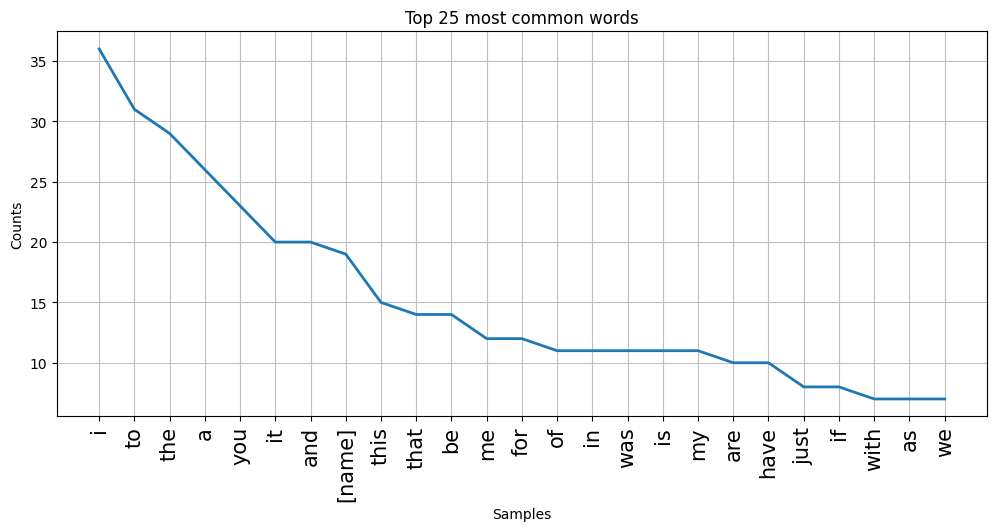

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
import re

def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    #new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

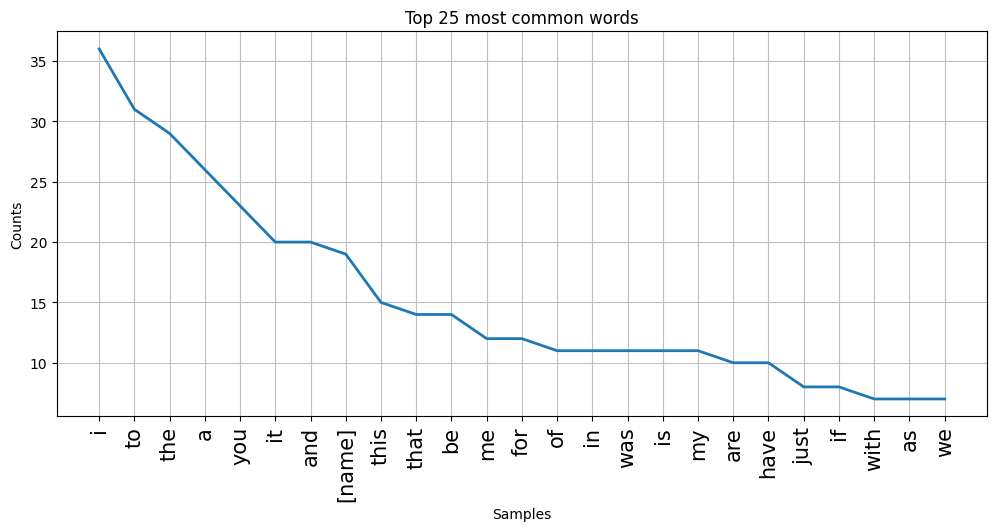

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


In [ ]:
import numpy as np

# Define the list of labels
labels = ['happy', 'sad', 'angry', 'happy', 'sad', 'neutral', 'angry']

# Get the unique labels and map them to integer values
unique_labels = np.unique(labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# Convert the labels to integer values
int_labels = [label_to_int[label] for label in labels]

print("Original labels:", labels)
print("Mapped integer labels:", int_labels)


Original labels: ['happy', 'sad', 'angry', 'happy', 'sad', 'neutral', 'angry']
Mapped integer labels: [1, 3, 0, 1, 3, 2, 0]


In [ ]:
import pandas as pd

# Create a sample DataFrame with multiple columns
df = pd.DataFrame({
    'Name': ['John', 'Mary', 'Peter'],
    'Age': [25, 30, 35],
    'IsStudent': [1, 0, 1],
    'IsEmployee': [0, 1, 0],
    'IsMarried': [1, 0, 0]
})

# Melt the DataFrame into a single column with column name
melted_df = pd.melt(df, id_vars=['Name', 'Age'], var_name='Attribute', value_name='Value')

# Filter out the rows where the value is not 1
filtered_df = melted_df[melted_df['Value'] == 1]

print("Original DataFrame:\n", df)
print("\nFiltered DataFrame:\n", filtered_df)



Original DataFrame:
     Name  Age  IsStudent  IsEmployee  IsMarried
0   John   25          1           0          1
1   Mary   30          0           1          0
2  Peter   35          1           0          0

Filtered DataFrame:
     Name  Age   Attribute  Value
0   John   25   IsStudent      1
2  Peter   35   IsStudent      1
4   Mary   30  IsEmployee      1
6   John   25   IsMarried      1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an example categorical variable
colors = ['red', 'green', 'blue', 'red', 'green', 'green']

# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the categories
le.fit(colors)

# Print the unique categories
print(list(le.classes_))

# Transform the categories into numerical values
encoded_colors = le.transform(colors)

# Print the encoded values
print(encoded_colors)




['blue', 'green', 'red']
[2 1 0 2 1 1]
